In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d rnunez1975/suicide-detection-clean

 68% 36.0M/53.3M [00:00<00:00, 132MB/s] 
100% 53.3M/53.3M [00:00<00:00, 140MB/s]


In [ ]:
!unzip /content/suicide-detection-clean.zip

Archive:  /content/suicide-detection-clean.zip
  inflating: Suicide_Detection_clean.csv  


In [ ]:
data=pd.read_csv("/content/Suicide_Detection_clean.csv")
data = data.fillna('')
print(data['class'].value_counts())
print(data.columns)

suicide        116037
non-suicide    116037
Name: class, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'text', 'class'], dtype='object')


In [ ]:
indices  = data['text'].values
labels = data['class'].values
x_train, x_test, y_train, y_test = train_test_split(
    indices , labels, test_size=0.20, random_state=1000)

In [ ]:
vocab_size = 700
X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in x_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in x_test]
max_length = 50
X_train = pad_sequences(X_train, maxlen=max_length, padding='pre')
X_test = pad_sequences(X_test, maxlen=max_length, padding='pre')
lb = LabelEncoder()
Y_train = lb.fit_transform(y_train) 
Y_test = lb.fit_transform(y_test) 
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 8)             5600      
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10)

Epoch 1/10
5802/5802 [==============================] - 13s 2ms/step - loss: 0.3579 - accuracy: 0.8473
Epoch 2/10
5802/5802 [==============================] - 12s 2ms/step - loss: 0.3320 - accuracy: 0.8608
Epoch 3/10
5802/5802 [==============================] - 14s 2ms/step - loss: 0.3257 - accuracy: 0.8635
Epoch 4/10
5802/5802 [==============================] - 12s 2ms/step - loss: 0.3219 - accuracy: 0.8659
Epoch 5/10
5802/5802 [==============================] - 12s 2ms/step - loss: 0.3196 - accuracy: 0.8665
Epoch 6/10
5802/5802 [==============================] - 11s 2ms/step - loss: 0.3182 - accuracy: 0.8675
Epoch 7/10
5802/5802 [==============================] - 12s 2ms/step - loss: 0.3172 - accuracy: 0.8677
Epoch 8/10
5802/5802 [==============================] - 11s 2ms/step - loss: 0.3164 - accuracy: 0.8687
Epoch 9/10
5802/5802 [==============================] - 12s 2ms/step - loss: 0.3160 - accuracy: 0.8686
Epoch 10/10
5802/5802 [==============================] - 12s 2ms/step - l

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Training Accuracy is {}'.format(accuracy*100))

1451/1451 [==============================] - 3s 2ms/step - loss: 0.3407 - accuracy: 0.8562
Training Accuracy is 85.62102913856506


1451/1451 [==============================] - 2s 1ms/step


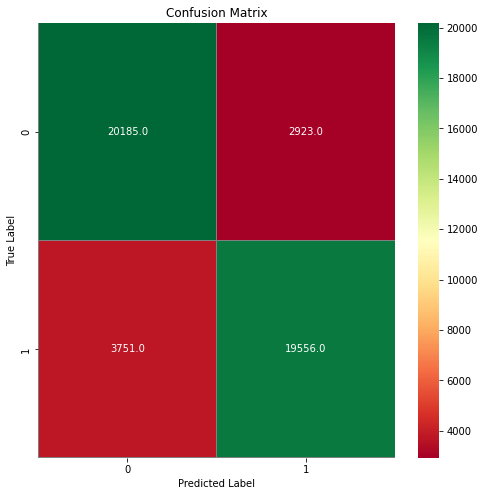

In [ ]:
Y_pred=model.predict(X_test)
Y_pred=(Y_pred>=0.5).astype("int")
confusion_mtx = confusion_matrix(Y_test, Y_pred) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="RdYlGn",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def predict_category(s,model=model):
    V=[s]
    vocab_size = 700
    VV = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in V]
    max_length = 50
    pr = pad_sequences(VV, maxlen=max_length, padding='pre')
    pred=model.predict(pr)
    pred=(pred>=0.5).astype("int")
    if pred[0] == 1:
      x = 'suicide'
    else:
      x = 'non-suicide' 
    return x

In [ ]:
predict_category('since the dead of my wife i feel void, i want to live no more')

1/1 [==============================] - 0s 33ms/step


'suicide'

In [ ]:
predict_category('i want to dance')

1/1 [==============================] - 0s 18ms/step


'non-suicide'

In [ ]:
predict_category('i want to die')

1/1 [==============================] - 0s 49ms/step


'suicide'

In [ ]:
predict_category('the pain came again, as if telling me that i would kill myself')

1/1 [==============================] - 0s 19ms/step


'suicide'